<a href="https://colab.research.google.com/github/nathan-tw/Data-Science-for-Cybersecurity/blob/master/HW06_106306027_%E6%9E%97%E5%AE%A3%E4%BD%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KDD Cup 99

http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ''bad'' connections, called intrusions or attacks, and ''good'' normal connections.


### Get training data

Note: we only use 10% data.


In [0]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

--2020-04-27 05:14:19--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  2.07MB/s    in 1.0s    

2020-04-27 05:14:21 (2.07 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [0]:
!gzip -d kddcup.data_10_percent.gz

In [0]:
!ls -al

total 73152
drwxr-xr-x 1 root root     4096 Apr 27 05:14 .
drwxr-xr-x 1 root root     4096 Apr 27 05:12 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


### Read data


In [0]:
import pandas as pd

In [0]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
  
kdd_data_10percent = pd.read_csv("/content/kddcup.data_10_percent", header=None, names = col_names)
print(kdd_data_10percent.shape)

(494021, 42)


In [0]:
# hack !!!!!
# use even less data again, because this script may run slow
# here, you can only use a small portion of data
# I set it to 0.05

kdd_data_10percent = kdd_data_10percent.sample(frac=0.05)
print(kdd_data_10percent.shape)

(24701, 42)


In [0]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
227462,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0,smurf.
334079,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0,smurf.
274925,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0,smurf.
346434,4,tcp,smtp,SF,1354,329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149,88,0.59,0.07,0.01,0.0,0.01,0.0,0.0,0.0,normal.
408854,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,451,451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0,smurf.


In [0]:
kdd_data_10percent['label'].value_counts()

# Note that 'normal' is normal traffic;
# the rests are all abnormal traffic.

smurf.              13977
neptune.             5341
normal.              4940
back.                 112
satan.                 71
ipsweep.               67
warezclient.           60
portsweep.             53
teardrop.              50
pod.                   14
nmap.                  10
buffer_overflow.        3
guess_passwd.           2
warezmaster.            1
Name: label, dtype: int64

In [0]:
kdd_data_10percent.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Question #1:

You need to deal with categorical columns, such as protocol_type, service, and flags.

However, you can simply ignore them now, and try deal with them later to improve the accuracy.

### feature selection

Some features are not useful. How do you know?

Assumem all of them are useful, and you can come back to check them later.

Note: features do not contain 'label'.

In [0]:
all_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate"
]

In [0]:
# 加入類別變數
features = kdd_data_10percent[all_features]
len(features.columns)

37

In [0]:
labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()

attack.    19761
normal.     4940
Name: label, dtype: int64

In [0]:
features = features.astype(float)

In [0]:
[column for column in features.columns if features.describe()[column]['min']==features.describe()[column]['max'] ]

['land', 'urgent', 'num_outbound_cmds', 'is_host_login']

In [0]:
features = features.drop(columns=['land', 'urgent', 'num_outbound_cmds', 'is_host_login'])

### Target



Question #2:

attack: normal = 4:1

A little bit unbalance. But it is not a serious problem. 

Do you want to apply oversampling or downsampling on the data?

If you want to, come back later to apply one of them on the data.

In [0]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(features, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
X_resampled_df = pd.DataFrame(X_resampled, columns=features.columns)

In [0]:
labels = pd.Series(y_resampled)

In [0]:
X_resampled_df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,1.00,0.0,0.00,0.0,0.0
1,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,1.00,0.0,0.00,0.0,0.0
2,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,1.00,0.0,0.00,0.0,0.0
3,4.0,1354.0,329.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,149.0,88.0,0.59,0.07,0.01,0.0,0.01,0.0,0.0
4,0.0,520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451.0,451.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,1.00,0.0,0.00,0.0,0.0


### Standardization or Normalization

Don't forget to shift the data. I provide 4 implementations. Simply choose one.

In [0]:
from sklearn.preprocessing import MinMaxScaler
features = pd.DataFrame(MinMaxScaler().fit_transform(X_resampled_df), columns = X_resampled_df.columns, index = X_resampled_df.index)

In [0]:
features.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
count,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000
mean,0.003342,0.000247,0.000312,0.001383,0.001598,0.000051,0.368487,0.000113,0.000239,0.000085,0.000179,0.000234,0.000230,0.000769,0.002611,0.408651,0.362834,0.110052,0.110064,0.057536,0.057787,0.864524,0.020729,0.070629,0.780084,0.758734,0.788438,0.040606,0.426641,0.013529,0.110052,0.109738,0.058024
std,0.029029,0.009174,0.005569,0.036092,0.031127,0.007114,0.480930,0.007999,0.013094,0.007981,0.008248,0.008636,0.014146,0.017367,0.049230,0.451807,0.466698,0.311742,0.311915,0.231545,0.231707,0.324219,0.093210,0.195653,0.360062,0.390590,0.375789,0.139759,0.472249,0.045791,0.311646,0.311796,0.226819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005175,0.005882,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.546810,0.545172,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064706,0.027451,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.065430,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000201,0.000091,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.020000,1.000000,0.010000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Question #3:

StandardScaler (mean=0; std=1) or MinMaxScaler (range 0~1)?

Which one does make sense when we analyze packets or flows? Why?




<font color='blue'>我選擇歸一化，因為歸一化對原始資料來說更完整的保留樣本間距，也許標準化可以使其接近常態分佈，但對分析封包來說，我認為歸一化更易於區別正常與異常，且有些數值並不適合以負數表示(標準化為了使平均值為0)</font>

### PCA and plot

Too many dimensions, try to use PCA to redue dimensions.


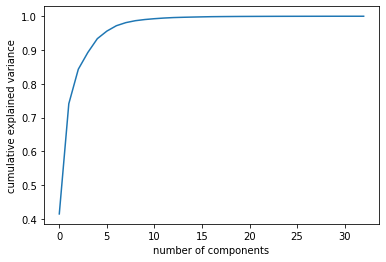

In [0]:
import matplotlib.pyplot as plt
from sklearn import decomposition

pca = decomposition.PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

Question #4:

how many dimensions are good enough?

<font color=blue>從上圖可以看到，5~8個dimensions已經解釋了約95%的變異



In [0]:
target_mapping = {'normal.':0, 'attack.':1}
y = pd.Series(y_resampled).map(target_mapping)

[4.15222452e-01 3.25931747e-01 1.02154420e-01 4.94475107e-02
 4.09242383e-02 2.23385183e-02 1.59383566e-02 9.19107896e-03
 5.69180296e-03 3.44775378e-03 2.44858976e-03 1.92790333e-03
 1.41519359e-03 8.31346096e-04 6.39670167e-04 6.06571607e-04
 5.43890809e-04 2.74566526e-04 2.20535715e-04 1.94251010e-04
 1.06130274e-04 9.83465044e-05 9.77655644e-05 7.81738087e-05
 4.67759359e-05 4.08835387e-05 3.60668846e-05 3.30367520e-05
 3.10408789e-05 2.47678625e-05 1.51877441e-05 1.36116380e-06
 6.45655053e-08]


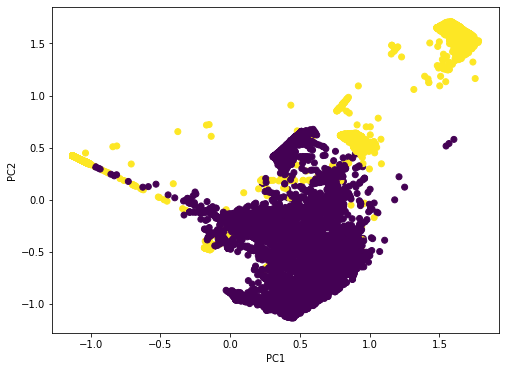

In [0]:
zpca = decomposition.PCA(n_components=5)
pca.fit(features)
X_PCA = pca.transform(features)

print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8,6))

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Question #5:

Guess what classifier may do good job? Why?

(Logistic Regression, SVM, Tree, KNN, ...)

<font color=blue> SVM 應該會比較好，因為單看上圖，以tree及Logistic Regression的極限應該會overfit

### Training a classifier


with all dimensions.

In [0]:
from time import time

In [0]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf.fit(features, labels)

end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 1.3103399276733398 seconds.


In [0]:
from sklearn.svm import SVC

start_t = time()

svc = SVC()
svc.fit(X_PCA, labels)

end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 2.0789480209350586 seconds.


Question #6:

How long would it take to train a knn model? Why?

Can you shorten it? How?



<font color=blue>花了1.3秒，我認為經由pca應該會更快畢竟dimensions減少了

In [0]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

start_t = time()
clf2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf2.fit(X_PCA, labels)

end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 0.3127875328063965 seconds.


### Get testing data

Note that: we only use 10% of the download data to save your time.

In [0]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz

--2020-04-27 06:07:03--  http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1409035 (1.3M) [application/x-gzip]
Saving to: ‘corrected.gz.1’

corrected.gz.1      100%[===================>]   1.34M   731KB/s    in 1.9s    

2020-04-27 06:07:05 (731 KB/s) - ‘corrected.gz.1’ saved [1409035/1409035]



In [0]:
!gzip -d corrected.gz

gzip: corrected already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [0]:
!ls -al

total 122060
drwxr-xr-x 1 root root     4096 Apr 27 06:07 .
drwxr-xr-x 1 root root     4096 Apr 27 05:12 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 47251540 May 16  2000 corrected
-rw-r--r-- 1 root root  1409035 May 16  2000 corrected.gz
-rw-r--r-- 1 root root  1409035 May 16  2000 corrected.gz.1
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


In [0]:
# read test data
kdd_data_corrected = pd.read_csv("/content/corrected", header=None, names = col_names)

# randomly select ?% data as testing data
features_test = kdd_data_corrected.sample(frac=0.01)
print(features_test.shape)

(3110, 42)


In [0]:
features_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [0]:
# change target to 'attack'
y_test = features_test['label'].copy()
y_test[y_test!='normal.'] = 'attack.'

# target
y_test.value_counts()

# select features
x_test = features_test[all_features]
x_test = x_test.astype(float)
x_test = x_test.drop(columns=['land', 'urgent', 'num_outbound_cmds', 'is_host_login'])

# standardization or normailzation
x_test = pd.DataFrame(MinMaxScaler().fit_transform(x_test), columns = x_test.columns, index = x_test.index)

In [0]:
# prediction
y_knn_pred = clf.predict(x_test)

# applt pca
X_test_PCA = pca.transform(x_test)

y_pca_knn_pred = clf2.predict(X_test_PCA)
y_pca_svm_pred = svc.predict(X_test_PCA)

Question #7:

You accuracy?

In [0]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, y_knn_pred)
pca_knn_accuracy = accuracy_score(y_test, y_pca_knn_pred)
pca_svm_accuracy = accuracy_score(y_test, y_pca_svm_pred)
print("knn ACC: {}.".format(round(knn_accuracy,4)))
print("knn pca ACC: {}.".format(round(pca_knn_accuracy,4)))
print("svm pca ACC: {}.".format(round(pca_svm_accuracy,4)))

knn ACC: 0.9277.
knn pca ACC: 0.9277.
svm pca ACC: 0.927.


It's still the same 都好像沒有變

Nothing changed 還是討厭不準確

### Try Clustering


In [0]:
features = kdd_data_10percent[all_features] # original features

from sklearn.cluster import KMeans
k = 30
km = KMeans(n_clusters = k)

km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pd.Series(km.labels_).value_counts()

0     11822
11     7464
23     2580
15      999
29      547
24      253
9       197
16      172
21      147
5       112
7       109
19       65
22       52
25       45
14       45
12       34
6        17
13       11
28        9
18        6
1         3
10        2
26        2
17        2
8         1
20        1
4         1
3         1
2         1
27        1
dtype: int64

Question #8:

There are 30 clusters.

Could you find out which 'lable' is the majority in each cluster?


In [0]:
abels = kdd_data_10percent['label'].copy() # original labels
cluster_df = pd.DataFrame({"original_label": labels, "cluster_label": km.labels_})
cluster_df.head()

,original_label,cluster_label
227462,smurf.,0
334079,smurf.,0
274925,smurf.,0
346434,normal.,0
408854,smurf.,23


In [0]:
result = [cluster_df[cluster_df["cluster_label"] == i]["original_label"].value_counts() for i in range(30)]

In [0]:
for i, v in enumerate(result):
  print('Cluster {} labels:'.format(i))
  print(v)
  print()

Cluster 0 labels:
smurf.          11400
normal.           405
pod.               14
warezclient.        3
Name: original_label, dtype: int64

Cluster 1 labels:
warezclient.    3
Name: original_label, dtype: int64

Cluster 2 labels:
warezmaster.    1
Name: original_label, dtype: int64

Cluster 3 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 4 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 5 labels:
back.    112
Name: original_label, dtype: int64

Cluster 6 labels:
normal.    17
Name: original_label, dtype: int64

Cluster 7 labels:
normal.    109
Name: original_label, dtype: int64

Cluster 8 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 9 labels:
normal.    197
Name: original_label, dtype: int64

Cluster 10 labels:
normal.    2
Name: original_label, dtype: int64

Cluster 11 labels:
neptune.         5341
normal.          1844
satan.             71
ipsweep.           67
teardrop.          50
portsweep.         48
warezclient.       31

Question #9:

How do you name a cluster by the lables?

What if the lable in a cluster has no majority?

In [0]:
pass

Question #10:

Now you may go back to pervious cells to check if what you can improve.
List what have you done right here.

<font color=blue>其實原本有加入類別變數，但處理上太麻煩又被我淘汰掉了

<font color=blue>加上SMOTE